In [190]:
# Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

In [191]:
# Reading CSV File
df = pd.read_csv('Uber.csv')
df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [192]:
# checking no. of rows and column
df.shape

(1156, 7)

In [193]:
# checking structure of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [194]:
df.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*'],
      dtype='object')

In [195]:
# function to rename column to remove special character
def RenameColumn(DataFrame):
    """ Input DataFrame to change its Column name """
    # Get the current column names of the DataFrame
    col_names = list(DataFrame.columns)
    character = ['!','#','$','%','^','&','*','(',')','{','}','[',']']
    new_col_names = []
    for col in col_names:
        new = col.title()
        for i in new:
            if i in character:
                new = new.replace(i,'')
                new_col_names.append(new)
    print(new_col_names)
    DataFrame.columns = new_col_names
    return DataFrame

df = RenameColumn(df)

In [197]:
df

,Start_Date,End_Date,Category,Start,Stop,Miles,Purpose
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [198]:
# checking any missing value
df.isnull().sum()

Start_Date      0
End_Date        1
Category        1
Start           1
Stop            1
Miles           0
Purpose       503
dtype: int64

In [199]:
# drop missing value 
df.dropna(subset=['Start_Date','End_Date','Category','Start','Stop','Miles'],inplace=True)

In [200]:
# fill missing values for Purpose column
df['Purpose'].fillna('Unknown',inplace=True)

In [201]:
# replacing special character to appropriate character to city name
df['Start'] = df['Start'].str.replace('?','a')
df['Stop'] = df['Stop'].str.replace('?','a')

In [202]:
df

,Start_Date,End_Date,Category,Start,Stop,Miles,Purpose
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,Unknown
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Karachi,Karachi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Karachi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site


In [203]:
# convert date(object) column to datetime column and calculate total ride duration
df['Start_Date'] = pd.to_datetime(df['Start_Date'],errors='coerce')
df['End_Date'] = pd.to_datetime(df['End_Date'],errors='coerce')
df['Ride_Duration'] = df['End_Date'] - df['Start_Date']

In [204]:
# Extract month and day name from date column
df['Month'] = df['Start_Date'].dt.month_name()
df['Day'] = df['Start_Date'].dt.day_name()

In [205]:
# statistics of dataset
df.describe(include='all')

,Start_Date,End_Date,Category,Start,Stop,Miles,Purpose,Ride_Duration,Month,Day
count,1155,1155,1155,1155,1155,1155.000000,1155,1155,1155,1155
unique,NaN,NaN,2,175,186,NaN,11,NaN,12,7
top,NaN,NaN,Business,Cary,Cary,NaN,Unknown,NaN,December,Friday
freq,NaN,NaN,1078,201,203,NaN,502,NaN,146,206
mean,2016-07-16 23:44:33.402597376,2016-07-17 00:07:47.999999744,NaN,NaN,NaN,10.566840,NaN,0 days 00:23:14.597402597,NaN,NaN
min,2016-01-01 21:11:00,2016-01-01 21:17:00,NaN,NaN,NaN,0.500000,NaN,0 days 00:00:00,NaN,NaN
25%,2016-04-01 02:10:00,2016-04-01 02:35:00,NaN,NaN,NaN,2.900000,NaN,0 days 00:10:00,NaN,NaN
50%,2016-07-21 17:17:00,2016-07-21 17:23:00,NaN,NaN,NaN,6.000000,NaN,0 days 00:16:00,NaN,NaN
75%,2016-10-27 21:06:30,2016-10-27 21:21:00,NaN,NaN,NaN,10.400000,NaN,0 days 00:27:30,NaN,NaN
max,2016-12-31 22:08:00,2016-12-31 23:51:00,NaN,NaN,NaN,310.300000,NaN,0 days 05:36:00,NaN,NaN


In [206]:
# Top 10 rides by rides duration
df.sort_values(['Ride_Duration'],ascending=False).head(10)

,Start_Date,End_Date,Category,Start,Stop,Miles,Purpose,Ride_Duration,Month,Day
776,2016-09-27 21:01:00,2016-09-28 02:37:00,Business,Unknown Location,Unknown Location,195.6,Unknown,0 days 05:36:00,September,Tuesday
269,2016-03-25 16:52:00,2016-03-25 22:22:00,Business,Latta,Jacksonville,310.3,Customer Visit,0 days 05:30:00,March,Friday
546,2016-07-14 16:39:00,2016-07-14 20:05:00,Business,Morrisville,Banner Elk,195.3,Unknown,0 days 03:26:00,July,Thursday
559,2016-07-17 12:20:00,2016-07-17 15:25:00,Personal,Boone,Cary,180.2,Commute,0 days 03:05:00,July,Sunday
881,2016-10-30 15:22:00,2016-10-30 18:23:00,Business,Asheville,Mebane,195.9,Unknown,0 days 03:01:00,October,Sunday
268,2016-03-25 13:24:00,2016-03-25 16:22:00,Business,Cary,Latta,144.0,Customer Visit,0 days 02:58:00,March,Friday
727,2016-08-27 16:15:00,2016-08-27 19:13:00,Business,Unknown Location,Unknown Location,156.9,Unknown,0 days 02:58:00,August,Saturday
297,2016-04-02 19:38:00,2016-04-02 22:36:00,Business,Jacksonville,Ridgeland,174.2,Customer Visit,0 days 02:58:00,April,Saturday
787,2016-10-06 08:49:00,2016-10-06 11:36:00,Business,Unknown Location,Rawalpindi,17.9,Unknown,0 days 02:47:00,October,Thursday
1088,2016-12-21 20:56:00,2016-12-21 23:42:00,Business,Rawalpindi,Unknown Location,103.0,Meeting,0 days 02:46:00,December,Wednesday


In [207]:
# Top 10 rides Miles
df.sort_values(['Miles'],ascending=False).head(10)

,Start_Date,End_Date,Category,Start,Stop,Miles,Purpose,Ride_Duration,Month,Day
269,2016-03-25 16:52:00,2016-03-25 22:22:00,Business,Latta,Jacksonville,310.3,Customer Visit,0 days 05:30:00,March,Friday
270,2016-03-25 22:54:00,2016-03-26 01:39:00,Business,Jacksonville,Kissimmee,201.0,Meeting,0 days 02:45:00,March,Friday
881,2016-10-30 15:22:00,2016-10-30 18:23:00,Business,Asheville,Mebane,195.9,Unknown,0 days 03:01:00,October,Sunday
776,2016-09-27 21:01:00,2016-09-28 02:37:00,Business,Unknown Location,Unknown Location,195.6,Unknown,0 days 05:36:00,September,Tuesday
546,2016-07-14 16:39:00,2016-07-14 20:05:00,Business,Morrisville,Banner Elk,195.3,Unknown,0 days 03:26:00,July,Thursday
559,2016-07-17 12:20:00,2016-07-17 15:25:00,Personal,Boone,Cary,180.2,Commute,0 days 03:05:00,July,Sunday
297,2016-04-02 19:38:00,2016-04-02 22:36:00,Business,Jacksonville,Ridgeland,174.2,Customer Visit,0 days 02:58:00,April,Saturday
299,2016-04-03 02:00:00,2016-04-03 04:16:00,Business,Florence,Cary,159.3,Meeting,0 days 02:16:00,April,Sunday
727,2016-08-27 16:15:00,2016-08-27 19:13:00,Business,Unknown Location,Unknown Location,156.9,Unknown,0 days 02:58:00,August,Saturday
268,2016-03-25 13:24:00,2016-03-25 16:22:00,Business,Cary,Latta,144.0,Customer Visit,0 days 02:58:00,March,Friday


In [209]:
# top 10 most picked route 
most_picked_route = pd.DataFrame(df['Purpose'])
most_picked_route['Route'] = df.apply(lambda a:f"{a['Start']}-{a['Stop']}",axis=1)
most_picked_route['Route'].value_counts().head(10)

Route
Unknown Location-Unknown Location    86
Morrisville-Cary                     75
Cary-Morrisville                     67
Cary-Cary                            53
Cary-Durham                          36
Durham-Cary                          32
Islamabad-Unknown Location           28
Unknown Location-Islamabad           28
Lahore-Lahore                        27
Islamabad-Islamabad                  25
Name: count, dtype: int64

In [210]:
# top 20 most picked route with its purpose
most_picked_route.groupby(['Purpose','Route']).value_counts().sort_values(ascending=False).head(20)

Purpose          Route                            
Unknown          Unknown Location-Unknown Location    56
Meal/Entertain   Cary-Morrisville                     27
Meeting          Cary-Durham                          27
                 Durham-Cary                          26
Unknown          Morrisville-Cary                     24
                 Islamabad-Islamabad                  21
                 Islamabad-Unknown Location           19
                 Unknown Location-Islamabad           19
Customer Visit   Morrisville-Cary                     18
Meal/Entertain   Morrisville-Cary                     18
Unknown          Cary-Morrisville                     15
Errand/Supplies  Cary-Cary                            14
Meal/Entertain   Cary-Cary                            12
Meeting          Cary-Cary                            12
Unknown          Whitebridge-Westpark Place           11
                 Lahore-Lahore                        11
                 Westpark Place-White

In [211]:
# most favorite start point
df.groupby(['Start'])[['Start']].value_counts().sort_values(ascending=False).head(10)

Start
Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Durham               37
Lahore               36
Karachi              31
Raleigh              28
Apex                 17
Name: count, dtype: int64

In [212]:
# most favorite stop point
df.groupby(['Stop'])[['Stop']].value_counts().sort_values(ascending=False).head(10)

Stop
Cary                203
Unknown Location    149
Morrisville          84
Whitebridge          65
Islamabad            58
Lahore               36
Durham               36
Raleigh              29
Karachi              28
Rawalpindi           18
Name: count, dtype: int64

In [213]:
# rarely chosen start point
df.groupby(['Start'])[['Start']].value_counts().sort_values(ascending=True).head(10)

Start
Winston Salem        1
Ridgeland            1
Jackson Heights      1
Rose Hill            1
Ingleside            1
Sand Lake Commons    1
Santa Clara          1
Seaport              1
Hell's Kitchen       1
Seattle              1
Name: count, dtype: int64

In [214]:
# rarely chosen stop point
df.groupby(['Stop'])[['Stop']].value_counts().sort_values(ascending=True).head(10)

Stop
Long Island City        1
Pontchartrain Beach     1
Parkwood                1
Parkway Museums         1
Palm Beach              1
Nugegoda                1
Northwest Rectangle     1
North Berkeley Hills    1
NoMad                   1
Mountain View           1
Name: count, dtype: int64

In [215]:
# Month and its top ride duration
ridebymonth = df.groupby('Month')['Ride_Duration'].max().reset_index()
ridebymonth

,Month,Ride_Duration
0,April,0 days 02:58:00
1,August,0 days 02:58:00
2,December,0 days 02:46:00
3,February,0 days 01:05:00
4,January,0 days 01:07:00
5,July,0 days 03:26:00
6,June,0 days 01:28:00
7,March,0 days 05:30:00
8,May,0 days 00:47:00
9,November,0 days 01:07:00


In [218]:
# category and its value counts
df.groupby(['Category'])['Category'].value_counts()

Category
Business    1078
Personal      77
Name: count, dtype: int64

In [219]:
# Purpose and its value count
df.groupby(['Purpose'])['Purpose'].value_counts().sort_values(ascending=False)

Purpose
Unknown            502
Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: count, dtype: int64

In [220]:
# category, purpose and its value count
df.groupby(['Category','Purpose'])['Category'].value_counts()

Category  Purpose        
Business  Airport/Travel       3
          Between Offices     18
          Customer Visit     101
          Errand/Supplies    128
          Meal/Entertain     160
          Meeting            187
          Temporary Site      50
          Unknown            431
Personal  Charity ($)          1
          Commute              1
          Moving               4
          Unknown             71
Name: count, dtype: int64

In [221]:
# month and its total rides
df.groupby(['Month'])['Month'].value_counts().sort_values(ascending=False)

Month
December     146
August       133
November     122
February     115
March        113
July         112
June         108
October      106
January       61
April         54
May           49
September     36
Name: count, dtype: int64

In [222]:
# day and its total ride
df.groupby(['Day'])['Day'].value_counts().sort_values(ascending=False)

Day
Friday       206
Tuesday      176
Monday       174
Thursday     154
Saturday     150
Sunday       148
Wednesday    147
Name: count, dtype: int64

[Text(0, 0, '54'),
 Text(0, 0, '133'),
 Text(0, 0, '146'),
 Text(0, 0, '115'),
 Text(0, 0, '61'),
 Text(0, 0, '112'),
 Text(0, 0, '108'),
 Text(0, 0, '113'),
 Text(0, 0, '49'),
 Text(0, 0, '122'),
 Text(0, 0, '106'),
 Text(0, 0, '36')]

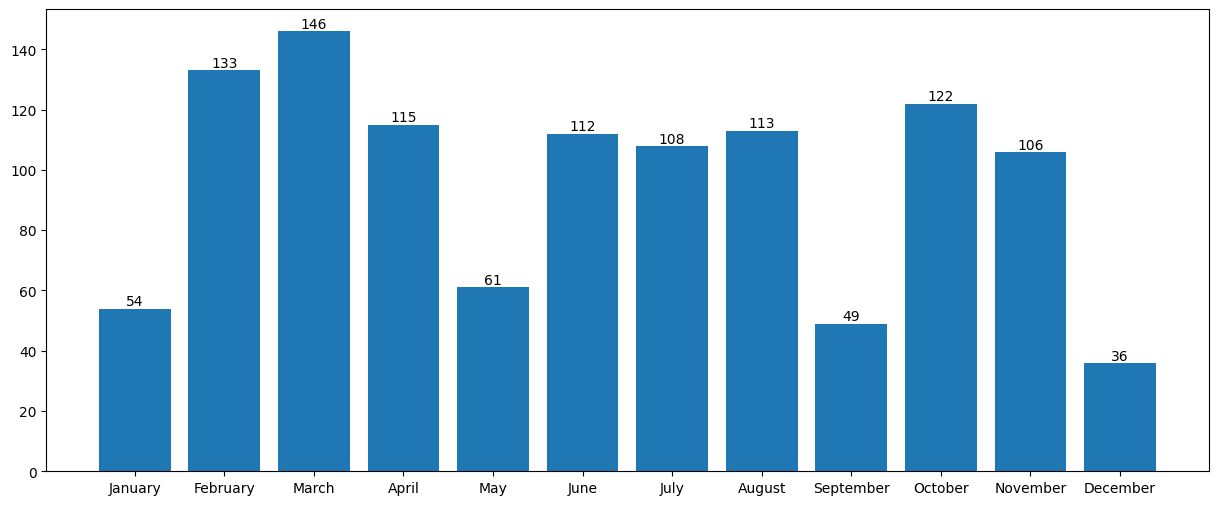

In [223]:
# Visualization of month and its total ride
fig, ax = plt.subplots(figsize =(15, 6))
bars = ax.bar(df['Month'].unique(),df.groupby(['Month'])['Month'].value_counts())
# plt.bar(df['Month'].unique(),df.groupby(['Month'])['Month'].value_counts())
ax.bar_label(bars)

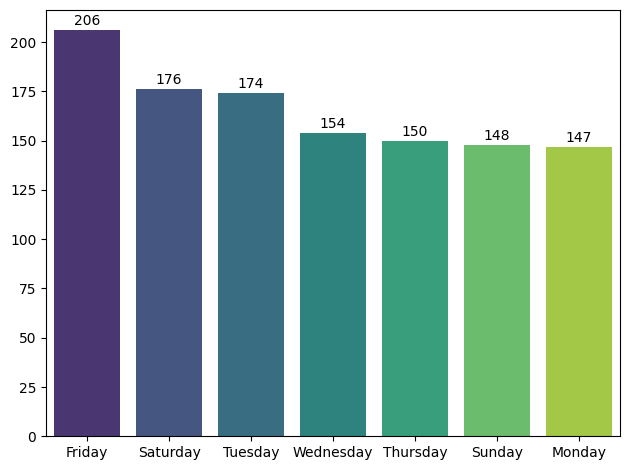

In [224]:
# day and its total ride visualization
day = list(df['Start_Date'].dt.day_name().unique())
values = list(df['Start_Date'].dt.day_name().value_counts())
ax = sns.barplot(x=day,y=values,palette='viridis')
for i,v in enumerate(values):
    ax.text(i,v+1,str(v),ha='center',va='bottom')
plt.tight_layout()

([<matplotlib.patches.Wedge at 0x1620edc1bb0>,
 [Text(-1.0759623636622138, 0.22870284646768646, 'Business'),
  Text(1.0759623690153899, -0.22870282128297006, 'Personal')],
 [Text(-0.5868885619975711, 0.1247470071641926, '93.3%'),
  Text(0.5868885649174853, -0.12474699342707457, '6.7%')])

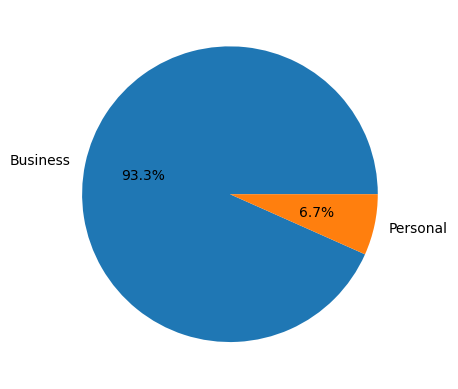

In [225]:
# category column visualization
plt.pie(data=df,x=df['Category'].value_counts(),labels=df['Category'].unique(),autopct="%1.1f%%")

In [237]:
# save clean file to local machine
# df.to_csv('UberEDA.csv')